# Clustering On Credit Card Dataset



## dataset link 
https://drive.google.com/file/d/1yw3h7sX8M3C8thZKVXnTzcutCYqTGcmz/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/M.Tech(DSA)/CC GENERAL.csv")
data.head()

Mounted at /content/drive


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Preprocessing

In [2]:
print(f"data contains {data.shape[0]} rows and {data.shape[1]} columns")

data contains 8950 rows and 18 columns


In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### There are some missing values in the columns CREDIT_LIMIT and MINIMUM_PAYMENTS

In [5]:
data["CUST_ID"][data.duplicated(subset=["CUST_ID"])==True]

Series([], Name: CUST_ID, dtype: object)

#### There is no duplicate values in the dataset

In [6]:
data.shape

(8950, 18)

In [7]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [8]:
print("Percentage of outliers present in each columns in the dataset")
data1 = data.drop(['CUST_ID'], axis=1)
for column in data1.columns:
    data2 = data1[column]
    percent = str(round(outlier_percent(data2), 2))
    print(f'Outliers in "{column}": {percent}%')

Percentage of outliers present in each columns in the dataset
Outliers in "BALANCE": 7.77%
Outliers in "BALANCE_FREQUENCY": 16.68%
Outliers in "PURCHASES": 9.03%
Outliers in "ONEOFF_PURCHASES": 11.32%
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Outliers in "CASH_ADVANCE": 11.51%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 8.56%
Outliers in "CREDIT_LIMIT": 2.77%
Outliers in "PAYMENTS": 9.03%
Outliers in "MINIMUM_PAYMENTS": 9.74%
Outliers in "PRC_FULL_PAYMENT": 16.47%
Outliers in "TENURE": 15.26%


#### We need to remove outliers from the dataset

In [9]:
for column in data1.columns:
    data2 = data1[column]
    
    Q1 = data2.quantile(0.25)
    Q3 = data2.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data2 < minimum) |(data2 > maximum))
    data1[column].loc[outliers] = np.nan

In [10]:
data1.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8255 non-null   float64
 1   BALANCE_FREQUENCY                 7457 non-null   float64
 2   PURCHASES                         8142 non-null   float64
 3   ONEOFF_PURCHASES                  7937 non-null   float64
 4   INSTALLMENTS_PURCHASES            8083 non-null   float64
 5   CASH_ADVANCE                      7920 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8168 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8425 non-null   float64
 10  CASH_ADVANCE_TRX                  8146 non-null   float64
 11  PURCHASES_TRX                     8184 non-null   float64
 12  CREDIT

In [12]:
data1.shape

(8950, 17)

#### we need to find the value for all the NAN value which present in the dataset before and after removing the outliers so for that i used model based imputaion method and for that i used knn algorithm

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(data1), columns=data1.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Exploratory Data Analysis

In [14]:
imp_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.000,0.0,1068.127248,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.170,0.0,0.000000,1.000000,0.650000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.981818,1499.00,309.918,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,1112.028902,0.000000,12.0
4,817.714335,1.000000,16.00,16.000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


#### Univariate Analysis

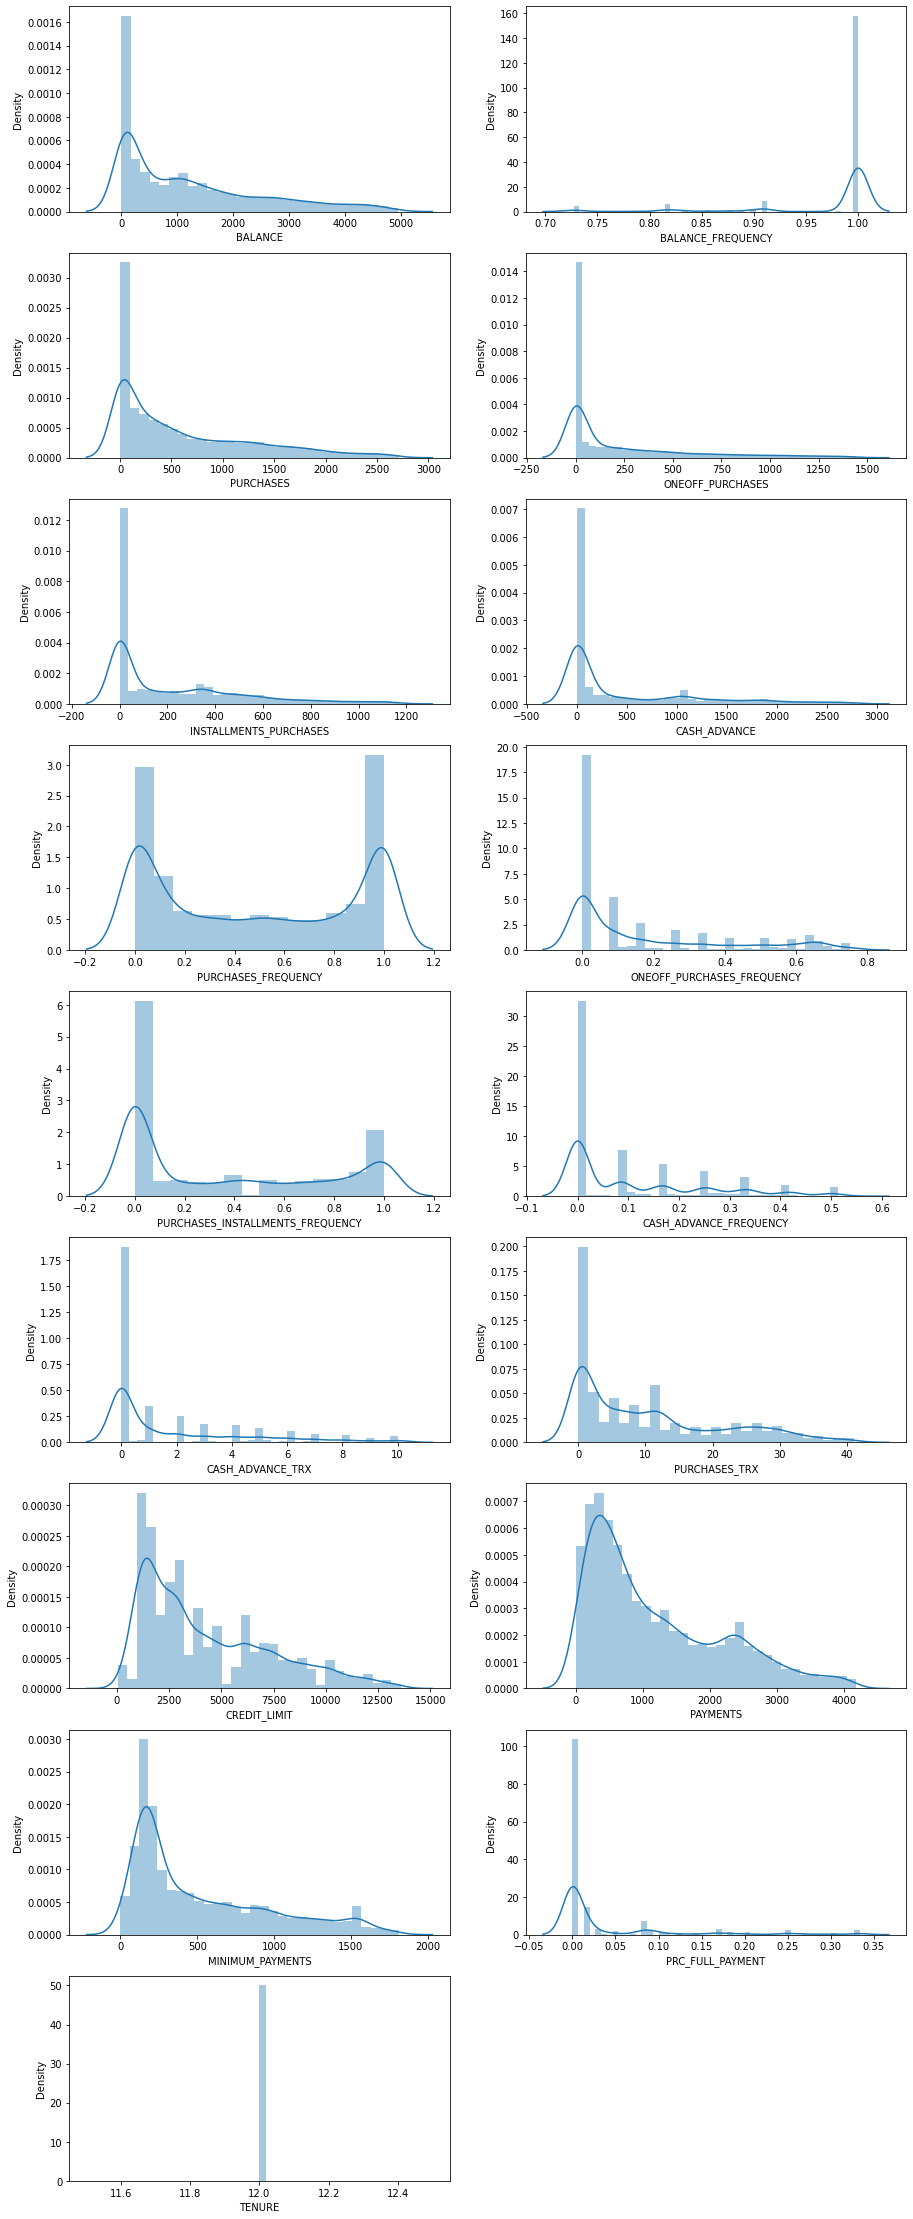

In [15]:
fig,axes = plt.subplots(nrows=9,ncols=2,figsize=(15,40))
count=0
for i,ax in zip(range(17),axes.flat):
        plt.style.use("ggplot")
        sns.distplot(imp_data.iloc[:,count],ax=ax)
        count=count+1
axes[8][1].pie([])

plt.show()

#### Bivariate Analysis

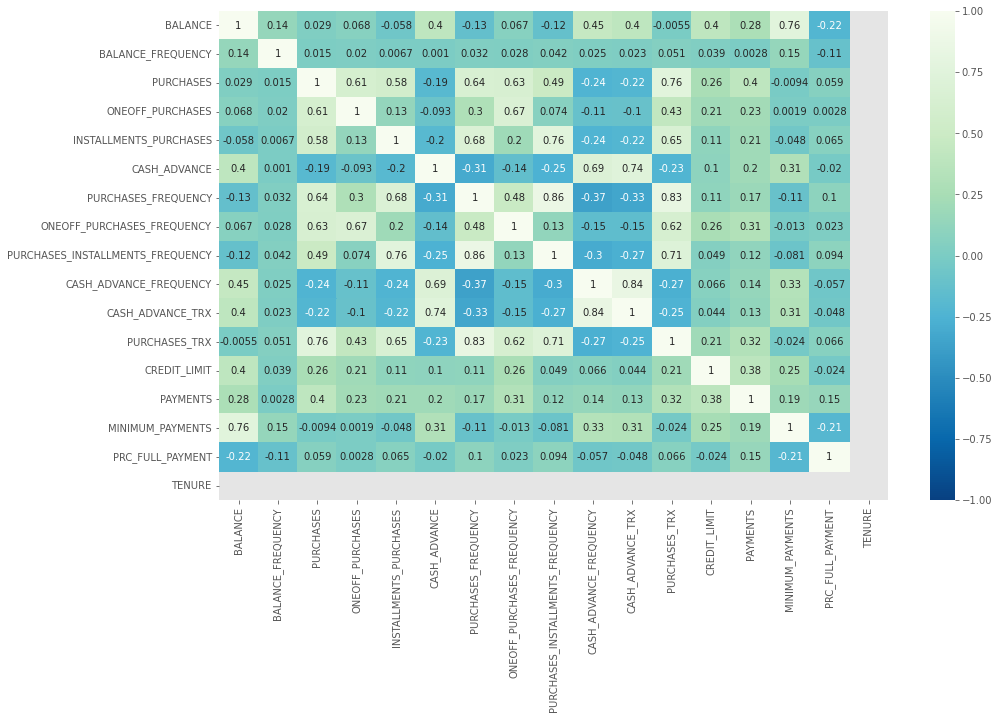

In [16]:
plt.figure(figsize=(15,9))
sns.heatmap(imp_data.corr(),annot=True,vmax=1,vmin=-1,cmap="GnBu_r")
plt.show()

#### Data Standarization

In [17]:
from sklearn.preprocessing import StandardScaler
std_imp_data = pd.DataFrame(StandardScaler().fit_transform(imp_data), columns=imp_data.columns)
std_imp_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000,8.950000e+03,8950.0
mean,-1.079707e-16,3.048586e-16,3.810732e-17,-1.270244e-17,1.429024e-17,-9.526830e-18,9.328354e-17,5.080976e-17,5.716098e-17,-9.645915e-17,-5.626784e-17,-2.540488e-17,1.143220e-16,2.540488e-17,0.000000,-3.493171e-17,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056,1.000056e+00,0.0
min,-9.705424e-01,-4.155613e+00,-9.108903e-01,-6.680081e-01,-7.877010e-01,-6.489617e-01,-1.221758e+00,-7.445069e-01,-9.169952e-01,-7.471386e-01,-6.816397e-01,-9.664333e-01,-1.365341e+00,-1.191788e+00,-1.158651,-4.496321e-01,0.0
25%,-8.698460e-01,3.667368e-01,-8.520893e-01,-6.680081e-01,-7.877010e-01,-6.489617e-01,-1.014125e+00,-7.445069e-01,-9.169952e-01,-7.471386e-01,-6.816397e-01,-8.736430e-01,-8.652070e-01,-8.090585e-01,-0.780375,-4.496321e-01,0.0
50%,-2.885189e-01,3.667368e-01,-3.756604e-01,-5.869491e-01,-4.754999e-01,-6.489617e-01,2.404259e-02,-3.779420e-01,-4.976286e-01,-7.471386e-01,-6.816397e-01,-3.169012e-01,-4.134727e-01,-3.372088e-01,-0.424355,-4.496321e-01,0.0
75%,5.627647e-01,3.667368e-01,6.123033e-01,3.670389e-01,5.317870e-01,5.418314e-01,1.062211e+00,4.285057e-01,9.701506e-01,4.369621e-01,4.783904e-01,6.110018e-01,6.513295e-01,6.760408e-01,0.636420,-2.118974e-01,0.0
max,2.909891e+00,3.667368e-01,3.121026e+00,3.512621e+00,3.318234e+00,3.338116e+00,1.269843e+00,2.554590e+00,1.599199e+00,3.128095e+00,3.185127e+00,2.837969e+00,3.006801e+00,2.979580e+00,2.850882,4.305075e+00,0.0


#### Dimensionality Reduction :- Principal Component Analysis

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
pca.fit(std_imp_data)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(std_imp_data), columns=PC_names)

In [31]:
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,LABELS
0,-1.215251,-2.827838,-0.370180,0.607974,0.499397,2.342189,0.168310,-0.321428,-0.007923,-0.022269,0.190087,3
1,-2.476212,2.287089,0.014172,2.050753,3.362462,-0.809681,1.085753,-0.978803,-0.166067,-0.227698,-0.397751,1
2,1.373165,0.766523,-2.600973,-1.143069,-0.337940,0.079264,0.418912,1.151081,-0.840810,0.212658,-0.059694,2
3,-0.934222,0.303211,-1.321325,-1.377430,0.438284,0.387129,0.385400,0.772468,1.130821,-0.181198,0.388287,3
4,-1.449524,-2.050373,-0.719359,-0.719164,-0.124127,-0.285183,-0.037347,-0.623524,-0.169468,-0.016935,0.269403,3


#### Finding the optimal cluster size

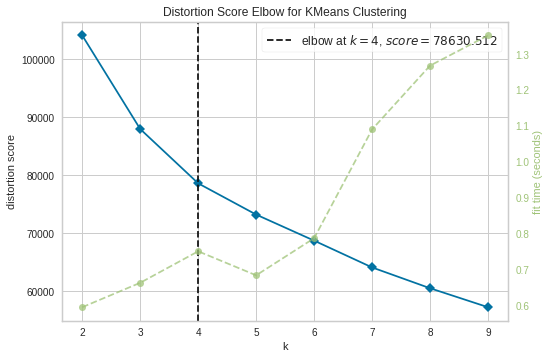

In [19]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(pca_data)       
distortion_visualizer.show()  

# K-Mean Clustering

In [20]:
kmeans = KMeans(distortion_visualizer.elbow_value_, random_state=42)
labels = kmeans.fit_predict(pca_data)
print(labels)

[3 1 2 ... 0 3 2]


In [21]:
pca_data['LABELS'] = labels

In [22]:
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,LABELS
0,-1.215251,-2.827838,-0.370180,0.607974,0.499397,2.342189,0.168310,-0.321428,-0.007923,-0.022269,0.190087,3
1,-2.476212,2.287089,0.014172,2.050753,3.362462,-0.809681,1.085753,-0.978803,-0.166067,-0.227698,-0.397751,1
2,1.373165,0.766523,-2.600973,-1.143069,-0.337940,0.079264,0.418912,1.151081,-0.840810,0.212658,-0.059694,2
3,-0.934222,0.303211,-1.321325,-1.377430,0.438284,0.387129,0.385400,0.772468,1.130821,-0.181198,0.388287,3
4,-1.449524,-2.050373,-0.719359,-0.719164,-0.124127,-0.285183,-0.037347,-0.623524,-0.169468,-0.016935,0.269403,3


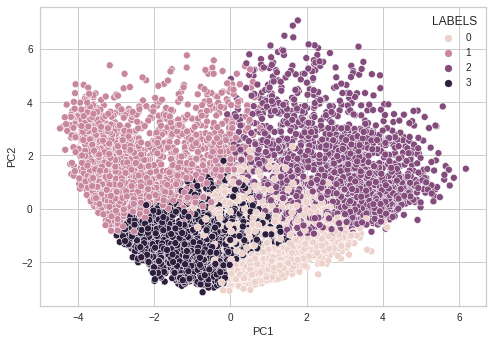

In [23]:
sns.scatterplot(data=pca_data, x="PC1", y="PC2", hue="LABELS")

In [30]:
import plotly.express as px
fig = px.scatter_3d(pca_data, x='PC1', y='PC2', z='PC3', color="LABELS")
fig.show()

In [24]:
data['LABELS'] = labels

In [25]:
cluster1 = data[data["LABELS"]==0]
cluster1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LABELS
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12,0
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,0
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,0
12,C10013,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12,0
17,C10018,41.089489,0.454545,519.00,0.00,519.00,0.0,0.416667,0.00,0.333333,0.0,0,8,2500.0,254.590662,73.203221,0.25,12,0


In [26]:
cluster2 = data[data["LABELS"]==1]
cluster2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LABELS
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.000000,0.0,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
15,C10016,6886.213231,1.000000,1611.7,0.0,1611.7,2301.491267,0.500000,0.000000,0.5,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,1
16,C10017,2072.074354,0.875000,0.0,0.0,0.0,2784.274703,0.000000,0.000000,0.0,0.250000,3,0,3000.0,391.974562,376.579631,0.000000,8,1
24,C10025,5368.571219,1.000000,0.0,0.0,0.0,798.949863,0.000000,0.000000,0.0,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,1
26,C10027,1615.967240,1.000000,102.0,102.0,0.0,244.840485,0.166667,0.166667,0.0,0.250000,5,2,1700.0,890.178845,971.183209,0.000000,12,1


In [27]:
cluster3 = data[data["LABELS"]==2]
cluster3.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LABELS
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.00,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.00,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,2
13,C10014,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.75,0.166667,0.750000,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12,2
21,C10022,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.00,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,2
23,C10024,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.00,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,2


In [28]:
cluster4 = data[data["LABELS"]==3]
cluster4.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LABELS
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,3
8,C10009,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.0,12,3
9,C10010,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.0,12,3
